# Digital Image Processing

## Importing packages

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from utils import *

In [4]:
print("Using " + np.__name__ + " version " + np.__version__)
print("Using " + cv2.__name__ + " version " + cv2.__version__)

Using numpy version 1.16.6
Using cv2 version 4.5.5


## Define the behavior of some tools

In [5]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 8.0)

## Defining variables

In [6]:
path = "../img/"
output_path = "lecture-001-Creating-and-showing-images"

## Creating images

### Creating an image filled with zeros

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


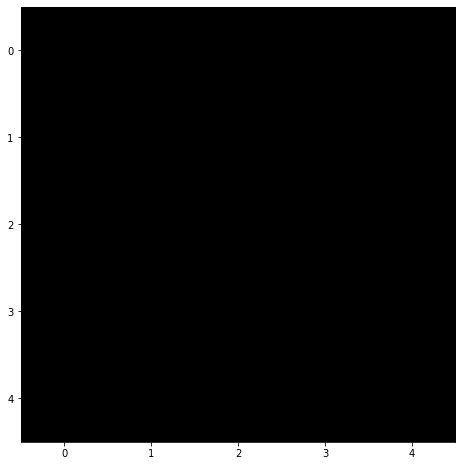

In [7]:
img = np.zeros((5,5), dtype=np.int16)
print(img)
plt.imshow(img, cmap='gray')
plt.show()

### Creating an image filled with ones

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


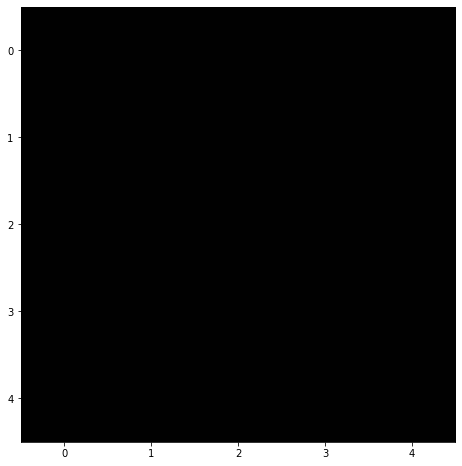

In [9]:
img = np.ones((5, 5))
print(img)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

### Creating an image filled with a scalar

float64
[[127. 127. 127. 127. 127.]
 [127. 127. 127. 127. 127.]
 [127. 127. 127. 127. 127.]
 [127. 127. 127. 127. 127.]
 [127. 127. 127. 127. 127.]]


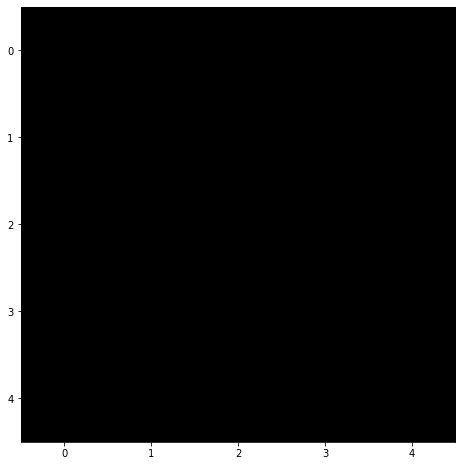

In [10]:
# Attention to data types and visualization
img = 127 * np.ones((5, 5))
print(img.dtype)
print(img)
plt.imshow(img, cmap='gray')
plt.show()

float64
[[127. 127. 127. 127. 127.]
 [127. 127. 127. 127. 127.]
 [127. 127. 127. 127. 127.]
 [127. 127. 127. 127. 127.]
 [127. 127. 127. 127. 127.]]


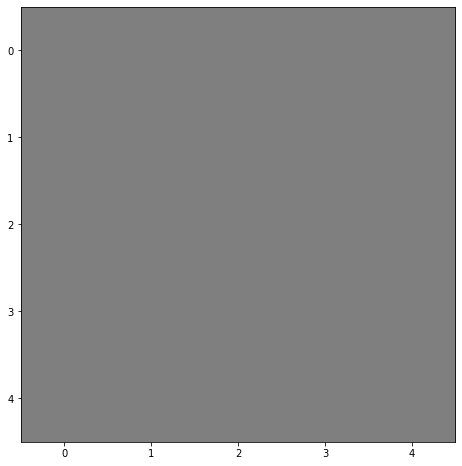

In [8]:
img = 127 * np.ones((5, 5))
print(img.dtype)
print(img)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

### Initializing a grayscale image with random values, uniformly distributed

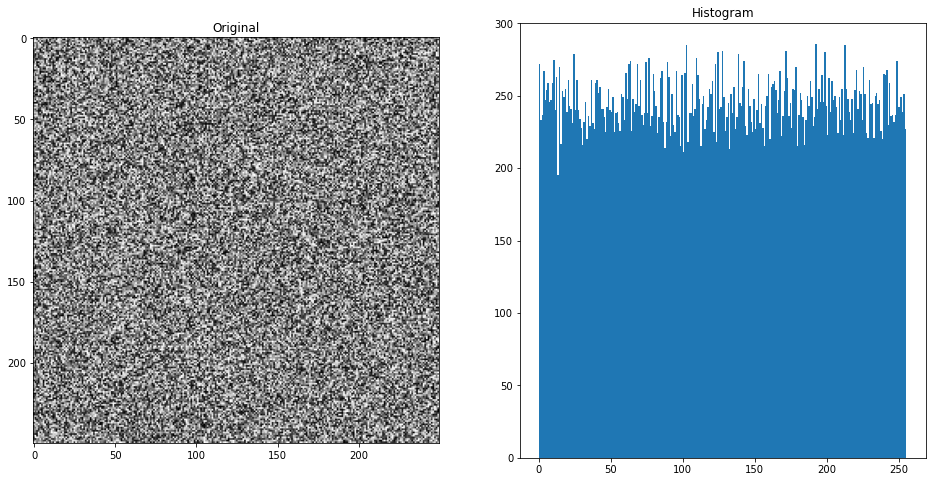

In [12]:
img = np.ones((250, 250), dtype=np.uint8)
cv2.randu(img, 0, 255)

plt.figure()
plt.subplot(121); plt.title("Original"); plt.imshow(img, cmap='gray')
plt.subplot(122); plt.title("Histogram"); plt.hist(img.ravel(), 256, [0, 256])
plt.show()

### Initializing a color image with random values, uniformly distributed

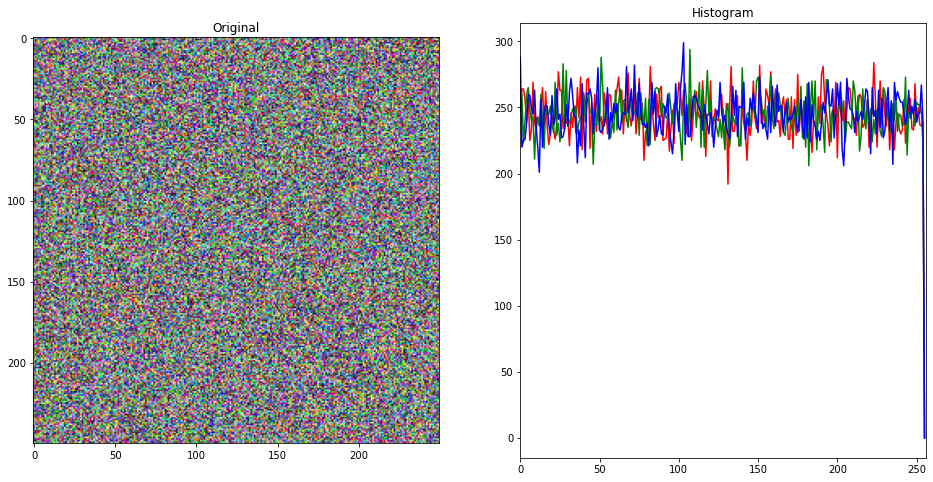

In [13]:
img = np.ones((250, 250, 3), dtype=np.uint8)
bgr = cv2.split(img)
cv2.randu(bgr[0], 0, 255)
cv2.randu(bgr[1], 0, 255)
cv2.randu(bgr[2], 0, 255)
img = cv2.merge(bgr)
cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure()
plt.subplot(121); plt.title("Original"); plt.imshow(img)
plt.subplot(122); plt.title("Histogram"); plot_histogram(img)
plt.show()

### Initializing a grayscale image with random values, normally distributed

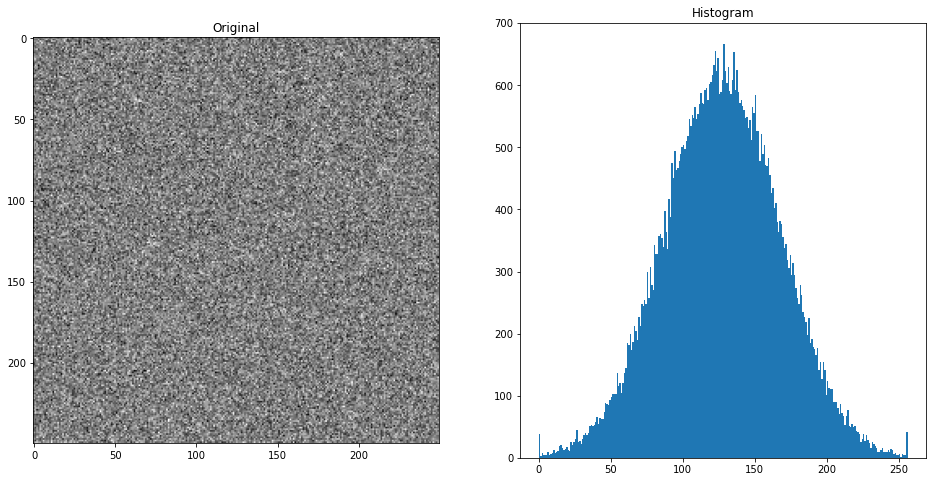

In [14]:
img = np.ones((250, 250), dtype=np.uint8)
cv2.randn(img, 127, 40)

plt.figure()
plt.subplot(121); plt.title("Original"); plt.imshow(img, cmap='gray')
plt.subplot(122); plt.title("Histogram"); plt.hist(img.ravel(), 256, [0, 256])
plt.show()

#### Use OpenCV to show an image

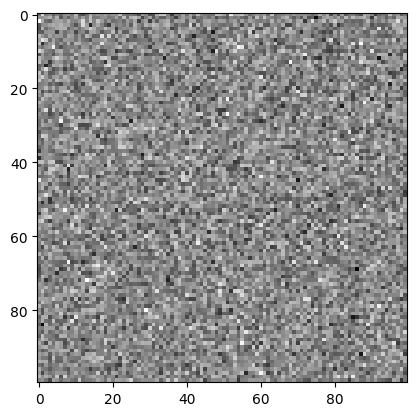

In [14]:
img = np.zeros((100,100), np.uint8)

cv2.namedWindow("img",  cv2.WINDOW_KEEPRATIO)
cv2.namedWindow('hist', cv2.WINDOW_KEEPRATIO)

def on_trackbar(val):
    pass

std = 5
cv2.createTrackbar('STD', 'hist', 0, 200, on_trackbar)

while True:
    # Process
    std = cv2.getTrackbarPos('STD','hist')

    cv2.randn(img, 127, std)

    hist = compute_histogram_1C(img)
    
    cv2.imshow("img", img)
    cv2.imshow("hist", hist)

    key = 0xFF & cv2.waitKey(1)
    if key == ord('q'):
        break
    elif key == ord('s'):
        cv2.imwrite(os.path.join(output_path,"randn_grayscale.png"), img)

cv2.destroyAllWindows()

plt.imshow(img, cmap='gray')
plt.show()

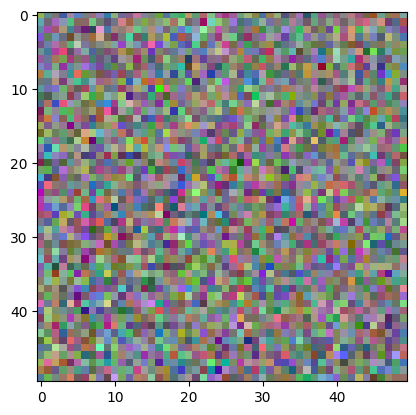

In [15]:
img = np.zeros((50, 50, 3), dtype=np.uint8)
cv2.namedWindow("img", cv2.WINDOW_KEEPRATIO)

while True:

    # Process
    bgr = cv2.split(img)
    cv2.randn(bgr[0], 127, 40)
    cv2.randn(bgr[1], 127, 40)
    cv2.randn(bgr[2], 127, 40)
    img = cv2.merge(bgr)

    cv2.imshow("img", img)

    key = 0xFF & cv2.waitKey(1)
    if key == ord('q'):
        break
    elif key == ord('s'):
        cv2.imwrite(os.path.join(output_path,"randn_color.png"), img)

cv2.destroyAllWindows()

plt.imshow(bgr2rgb(img))
plt.show()

## Attention to normalization

In [59]:
img = np.ones((3, 3), dtype=np.float64)

cv2.randn(img, 0, 1)
print("Normally distributed random values = \n", img, "\n\n")

img2 = cv2.normalize(img, None, 255, 0, cv2.NORM_MINMAX)
print("Normalized = \n", img2, "\n\n")

img2 = np.asarray(img2, dtype=np.uint8)
print("Converted to uint8 = \n", img2, "\n\n")

img3 = (255. * cv2.normalize(img, None, 1.0, 0, cv2.NORM_MINMAX)).astype(np.uint8)
print(img3, "\n\n")

print("img3 == img2?")
print((img3 == img2).all())

Normally distributed random values = 
 [[ 0.20641944  0.15309039  0.78488064]
 [-1.46542764  0.16896182 -0.24836598]
 [-0.09109111 -0.98217732  0.57124627]] 


Normalized = 
 [[1.89450045e+02 1.83406914e+02 2.55000000e+02]
 [6.97015620e-15 1.85205430e+02 1.37914758e+02]
 [1.55736802e+02 5.47608667e+01 2.30791421e+02]] 


Converted to uint8 = 
 [[189 183 255]
 [  0 185 137]
 [155  54 230]] 


[[189 183 254]
 [  0 185 137]
 [155  54 230]] 


img3 == img2?
False


In [15]:
# Normally distributed random values = 
#  [[-0.10685379 -0.3343182   0.6172743 ]
#  [-1.0519822   2.1705427   0.2486184 ]
#  [-0.12854138 -1.2465241  -0.5537428 ]] 


# Normalized = 
#  [[ 8.5048355e+01  6.8073730e+01  1.3908670e+02]
#  [ 1.4517767e+01  2.5499998e+02  1.1157561e+02]
#  [ 8.3429909e+01 -2.9158273e-06  5.1699078e+01]] 


# Converted to uint8 = 
#  [[ 85  68 139]
#  [ 14 254 111]
#  [ 83   0  51]] 


# [[ 85  68 139]
#  [ 14 255 111]
#  [ 83   0  51]] 


# img == img2?
# False